# Identification of Magical Creatures
## Part  0: Getting and Cleaning Data
### Simon Nash
These notebooks will explore diferent deep learning tequniques as applied to a fairly small multilabel classification dataset. Each creature card in Magic: The Gathering has one or more "creature types". It is also generally true that the artwork on the card depicts the creature described in the dataset.
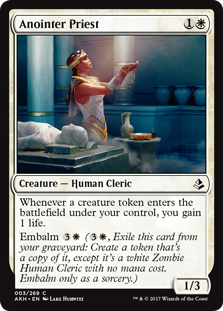
As a basic first exploration, we will be exploring a varriety of ways to map the image to the creature types, showing the advantages and pitfalls of a few different approaches one could take to the problem. But before we can do that, we need a dataset. If you'd like to skip to the hype part, feel free to skip this notebook.

### Getting a Card List
We could take a few different approaches here. Since we are just building a static dataset, using an api like https://docs.magicthegathering.io/ is kind of overkill (though it would also be a legitimate option). Later we will be scraping the images from http://gatherer.wizards.com, so we could plan to grab the rules text while we are there. However that would invovle some additional parsing, organization, and would ultimatly add some unessicary complexity to the task. We will go the simpilest route, and just grab json cardlist from https://mtgjson.com/.

In [127]:
# Import basic dependinces for processing the cardlist, and scrapping card images off the site.
import pandas as pd
import json
from pandas.io.json import json_normalize    
import urllib
import os
import cStringIO
import matplotlib.pyplot as plt
%matplotlib inline
all_sets = pd.read_json("AllSetsArray.json")
with open('AllSetsArray.json') as all_sets_file:    
    all_sets = json.load(all_sets_file)
all_cards = json_normalize(all_sets, 'cards',record_prefix='cards_')

### Pruning the Card List
This is way more than we need for the task. For the particular task of identifying creature types based on card image, we can throw away everything that isn't a card with a creature type

In [106]:
def is_creature_card (card_types):
    # Some of the 'cards' in the database are actually tokens. These have a type "NaN", so "in" will throw and error if we try to check if "Creature" iss in "NaN".
    # Make sure the 
    if type(card_types)==list:
        return 'Creature' in card_types
    else:
        return False
creature_cards = all_cards.loc[map(lambda x: is_creature_card(x), list(all_cards["cards_types"].values))]



### Grabbing the Images

In [ ]:
import numpy as np
for card in creature_cards["cards_multiverseid"].values:
    if not np.isnan(card):
        card_id = str(int(card))
        url='http://gatherer.wizards.com/Handlers/Image.ashx?multiverseid=' + str(card) + '&type=card'
        file_name=str(card)+'.jpg'
        filename_and_path=os.path.join('/home/simon/MTGCardImages/Cards', file_name)
        image=urllib.URLopener()
        try:
            image.retrieve(url, filename_and_path)
        except:
            print("Couldn't get card ." )

Couldn't get card.
Couldn't get card.
Couldn't get card.
Couldn't get card.
Couldn't get card.
Couldn't get card.
Couldn't get card.
Couldn't get card.
Couldn't get card.
Couldn't get card.
Couldn't get card.
Couldn't get card.
Couldn't get card.
Couldn't get card.
Couldn't get card.
Couldn't get card.
Couldn't get card.
Couldn't get card.
Couldn't get card.
Couldn't get card.
Couldn't get card.
Couldn't get card.
Couldn't get card.
Couldn't get card.
Couldn't get card.
Couldn't get card.
Couldn't get card.
Couldn't get card.
Couldn't get card.
Couldn't get card.
Couldn't get card.
Couldn't get card.
Couldn't get card.
Couldn't get card.
Couldn't get card.
Couldn't get card.
Couldn't get card.
Couldn't get card.
Couldn't get card.
Couldn't get card.
Couldn't get card.
Couldn't get card.
Couldn't get card.
Couldn't get card.
Couldn't get card.
Couldn't get card.
Couldn't get card.
Couldn't get card.
Couldn't get card.
Couldn't get card.
Couldn't get card.
Couldn't get card.
Couldn't get